# Contenidos de la clase
- Modelo matemático
- Trade off bias-variance
- Regresión lineal 
- Problemas con scikit learn
- Métricas

### Modelo matemático

Es una representación simplificada de un sistema real mediante ecuaciones o fórmulas

### Trade off bias-variance

El error debido al sesgo de un modelo es simplemente la diferencia entre el valor esperado y el valor real (error). 
Cuando se dice que un modelo tiene un bias alto quiere decir que el modelo es muy simple (no se ajusta correctamente a lo datos) --> **underfitting**. Los modelos lineales suelen sufrir errores de Bias (sesgo)

**Varianza**: Es cuánto varia la predicción según los datos que tengamos.

Modelo varianza baja indica que al cambiar los datos de entrenamiento produce cambios pequeños en mi estimación. Un modelo con varianza alta quiere decir que pequeños cambios en el dataset produciran cambios grandes en la salida (estimación)

![](files/bias-variance-2.png)
![](files/bias-variance.png)
![](files/bias-variance-3.png)

## Regresión lineal simple

y = a*x + b

## Regresión lineal multiple:
Y = A + a1 x1 +a2 x2 + ... an*Xn

## MSE

Error = |Yp - Yr| = |3 - 5| = | -2 | = 2

En estadística, el error cuadrático medio (mean squared error) de un estimador mide el promedio de los errores al cuadrado

MSE = (1/N) * Sumatoria([yp - yr]^2) el MSE debe ser lo más chico posible.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
X = np.array([45000,3000,3100,30000,14000,50000,16000,70000])
y_house_price = np.array([65000,10000,9500,15000,30000,100000,28000,150000])

<AxesSubplot: >

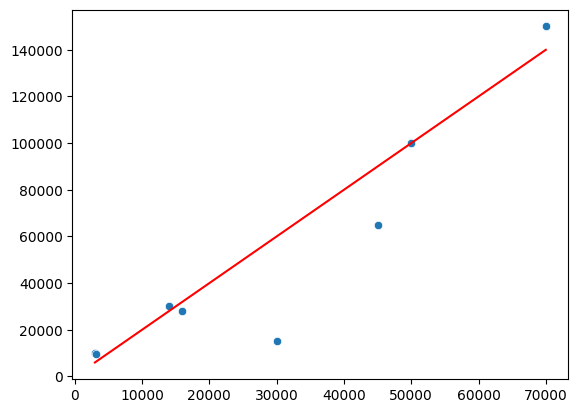

In [6]:
# Scatter plot
sns.scatterplot(x=X, y=y_house_price)
sns.lineplot(x=X,y=2*X, color='red')

## Regresión lineal con Sklearn

In [8]:
# Grado Fahrenheit F - 32 = C * 1.8 = Y = 1.6*X + 32
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X = celsius.reshape(-1,1) # transforma un vector a un vector columna [1,2,3] [[1],[2],[3]]
Y = fahrenheit.reshape(-1,1)

lr = LinearRegression()

In [14]:
model = lr.fit(X,Y)

In [29]:
m = model.coef_
b = model.intercept_
print("m real", m)
print("m ->", m[0][0])
print("b ->", b)
y = m[0][0]*X + b[0]

m real [[1.79794911]]
m -> 1.79794910748196
b -> [31.95252564]


<AxesSubplot: title={'center': 'C 2 F'}, xlabel='Ce', ylabel='F'>

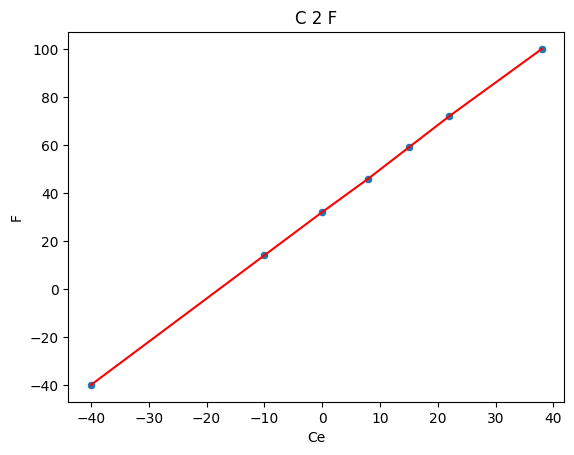

In [26]:
plt.xlabel("Ce")
plt.ylabel("F")
plt.title("C 2 F")
sns.lineplot(x=celsius,y=fahrenheit, color='red')
sns.scatterplot(x=celsius,y=fahrenheit)

In [31]:
# Error? Entre el valor predicho (recta) y el valor real 

mse = mean_squared_error(y,fahrenheit)
print("MSE: ",mse)

MSE:  0.06304595518420045


## R^2

Coeficiente de determinación es una medida utilizada para explicar cuanta variabilidad hay entre 2 variables. Bondad de ajuste se representa con un valor entre [0,1] -> Cuanto mayor sea R^2 indicara que el ajuste es más preciso

¿Que esperamos de valor para este modelo?


In [33]:
r2 = r2_score(y,fahrenheit)
print("r2: ", r2)

r2:  0.9999637049281158


In [35]:
df = pd.DataFrame({'celsius':celsius, 'fahrenheit': fahrenheit})
df

,celsius,fahrenheit
0,-40.0,-40.0
1,-10.0,14.0
2,0.0,32.0
3,8.0,46.0
4,15.0,59.0
5,22.0,72.0
6,38.0,100.0


<AxesSubplot: >

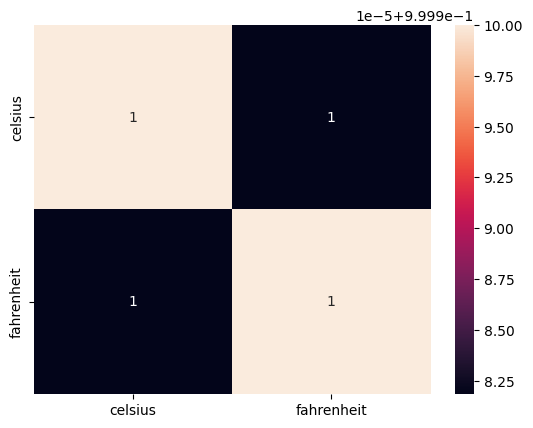

In [39]:
sns.heatmap(df.corr(method='pearson'), annot=True)

In [40]:
from sklearn.datasets import fetch_california_housing
california_housing_ds = fetch_california_housing()

In [42]:
houses_data = pd.DataFrame(data=california_housing_ds.data,columns=california_housing_ds.feature_names)
houses_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
houses_data['price'] = california_housing_ds.target


<AxesSubplot: >

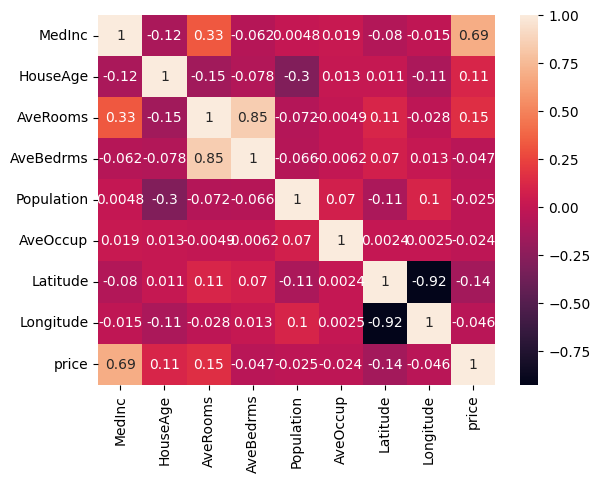

In [48]:
sns.heatmap(houses_data.corr(), annot=True)